# <p style="font-family:newtimeroman;color:#800080;font-weight: bold;font-size:150%;"> AB Testing - Comparing the Conversion of Bidding Methods</p>

# Business Problem


* Facebook recently introduced a new type of bidding, **"average bidding"**, as an alternative to the existing type of bidding called **"maximum bidding"**. 
* One of our clients decided to test this new feature and wants to run an **A/B test** **to see if average bidding brings more conversions than maximum bidding**.
* **The A/B test has been running for 1 month** and this client is now asking you to **analyze the results of this A/B test**. 
* The ultimate measure of **success for the website is Purchase**. 
* Therefore, for statistical testing, the **focus should be on the Purchase metric**.

# Dataset Story


This dataset, which contains a company's website information, includes information such as the number of advertisements seen and clicked by users, as well as information about the earnings that come from it. There are two separate datasets, the Control and the Test group. These datasets are located on separate sheets ofab_testing.xlsxexcel. Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

**impression**: Number of ad views

**Click**: Number of clicks on the displayed ad

**Purchase**: Number of products purchased after clicked ads

**Earning**: Earnings from purchased products

# Project Tasks

**AB Testing (Independent Two Sample T Test)**
1. Set up Hypotheses
2. Assumption Check
>Normality Assumption (shapiro)
>
>Homogeneity of Variance (levene)
3. Implementation of the Hypothesis
> Independent two sample t-test if assumptions are met
>
> Mannwhitneyu test if assumptions are not met
4. Interpret results according to p-value

**Note:**
- Direct number 2 if normality is not ensured. If variance homogeneity is not ensured, enter argument in number 1.
- It may be useful to perform outlier inspection and correction before normality inspection.

# Task 1: Preparing and Analyzing Data

In [23]:
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

import colorama
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
pd.options.display.max_columns=None
pd.options.display.max_rows=10
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.width = 1000

YEL = colorama.Fore.LIGHTYELLOW_EX
BLU = colorama.Fore.LIGHTBLUE_EX
colorama.init(autoreset=True)

**Step 1: Read the dataset named ab_testing_data.xlsx which consists of control and test group data. Assign control and test group data to separate variables.**

In [24]:
pd.ExcelFile("/kaggle/input/ab-test12/ab_testing.xlsx").sheet_names

control = pd.read_excel("/kaggle/input/ab-test12/ab_testing.xlsx", sheet_name="Control Group")
test = pd.read_excel("/kaggle/input/ab-test12/ab_testing.xlsx", sheet_name="Test Group")

**Step 2 Analyze the control and test group data.**

In [25]:
control.describe([0.01,0.99]).T
test.describe([0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
Impression,40.000,120512.412,18807.449,79033.835,79112.255,119291.301,158245.264,158605.920
Click,40.000,3967.550,923.095,1836.630,2005.234,3931.360,6012.877,6019.695
Purchase,40.000,582.106,161.153,311.630,325.214,551.356,876.576,889.910
Earning,40.000,2514.891,282.731,1939.611,1942.784,2544.666,3091.941,3171.490


**Step 3: After the analysis, combine the control and test group data using the concat method.**

In [26]:
control["Group"] = "control"
test["Group"] = "test"
df = pd.concat([control,test], ignore_index=True)

c,t = sms.DescrStatsW(df["Purchase"]).tconfint_mean()
print(f"{YEL} Confidence Interval: {c: .3f} - {t: .3f}")

 Confidence Interval:  533.533 -  599.467


# Task 2: Defining the Hypothesis of the A/B Test

**Step 1: Define the hypothesis.**

* H₀: There is no statistically significant difference between the two groups.
* H₁: There is a statistically significant difference between the two groups.

**Step 2: Analyze the purchase means for the control and test group**

In [27]:
c,t = control['Purchase'].mean(),test['Purchase'].mean()

print(f"{YEL}MaximumBidding Grubu Purchase Average: {c:.3f}")
print(f"{YEL}AverageBidding Grubu Purchase Average: {t:.3f}")

MaximumBidding Grubu Purchase Average: 550.894
AverageBidding Grubu Purchase Average: 582.106


# Task 3: Performing Hypothesis Testing

**Step 1: Before conducting hypothesis testing, make assumption checks. These are the Assumption of Normality and Homogeneity of Variance.**

* Test whether the control and test groups comply with the normality assumption separately on the Purchase variable

> H₀: Observations in the Control Group are Normally Distributed
>
> H₁: Observations in the Control Group are not Normally Distributed

In [28]:
w,p = shapiro(control['Purchase'])
print(f"{YEL} W: {w: .3f} \n p-Value: {p: .3f}")
0.05

 W:  0.977 
 p-Value:  0.589


0.05

> H₀: Observations in the Test Group are Normally Distributed
>
> H₁: Observations in the Test Group are Not Normally Distributed

 W:  0.959 
 p-Value:  0.154


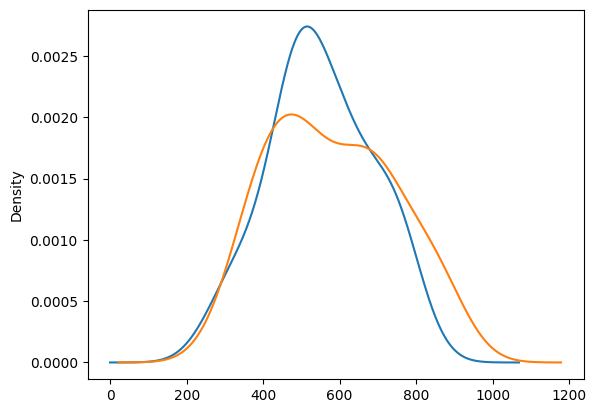

In [29]:
w,p = shapiro(test['Purchase'])
print(f"{YEL} W: {w: .3f} \n p-Value: {p: .3f}")

control['Purchase'].plot(kind="kde")
test['Purchase'].plot(kind="kde")
plt.show()

* **TODO - homogeneity (similarity) of variance**.
>
> H₀: There is no significant difference between the variances of Control and Test groups.
>
> H₁: There is a significant difference between the variances of Control and Test groups.


In [30]:
w,p = levene(control['Purchase'],test['Purchase'])
print(f"{YEL}W: {w:.3f}\np-Value: {p: .3f}")

W: 2.639
p-Value:  0.108


* **Since the p-value is 0.1082, the null hypothesis for variance similarity cannot be rejected, i.e., there is no sufficiently strong evidence of a significant difference between the variances of the groups. (Variances Similar)**

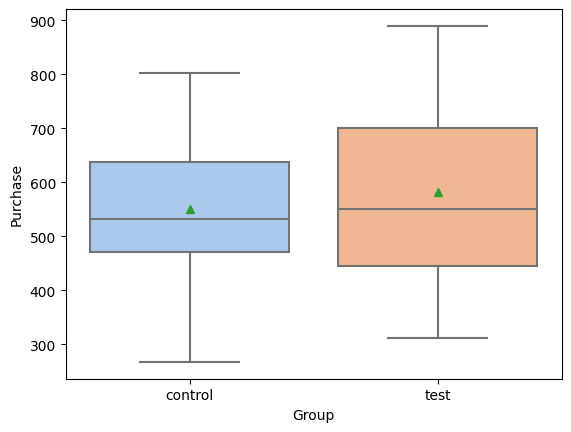

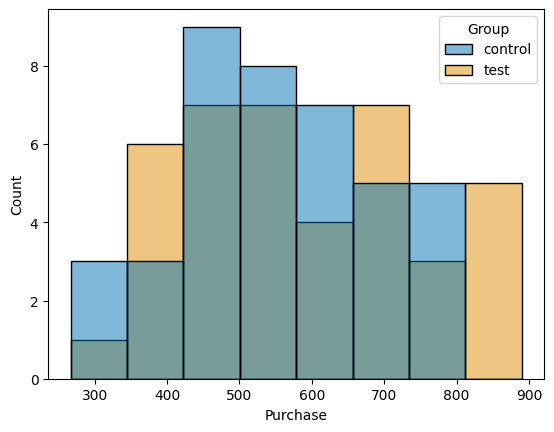

In [31]:
sns.boxplot(y="Purchase", x="Group", data=df, showmeans=True, palette="pastel")
plt.show()
sns.histplot(x="Purchase", hue="Group", data=df, palette="colorblind")
plt.show()

* **Step 2 Select the appropriate test based on the Assumption of Normality and Homogeneity of Variance results**

* Since the null hypothesis of a normal distribution is not rejected, we need to use a parametric method.

> H₀: There is no statistically significant difference between the two group means.
>
> H₁: There is a statistically significant difference between the two group averages.

In [32]:
t, p, = ttest_ind(control['Purchase'], test['Purchase'], equal_var = True)
print(f"{YEL}\tt:  {t:.3f}\n\tp-Value: {p:.3f}")

	t:  -0.942
	p-Value: 0.349


**Step 3: Considering the p_value obtained as a result of the test, interpret whether there is a statistically significant difference between the control and test group purchase averages.**

> * The p-value was 0.349, which means that there is no statistically significant difference between the two group means, i.e. hypothesis H₀ cannot be rejected.

# Task 4 : Analysis of Results

* **Step 1: Which test did you use and why?**

* I used ttest_ind (independent two sample T-test) because we could not reject the null hypothesis of normality, we entered the equal_var parameter True because we could not reject variance similarity.
* We used "Student's t-test" because their variances are similar, if they were not equal we would use "Welch's t-test" (it chooses itself according to the equal_var parameter)


* **Step 2: Make a recommendation to the customer based on the test results you have obtained.**

* There was no statistically significant difference between the Control and Test groups in terms of "Purchase",
* Our client should base their ad bidding strategy on other determining factors such as Clicks or Earning.

# Task 5: Functionalization

In [33]:
def report(group1, group2, column,sig_level=0.05, Conf=False):
    """
    :param group1: Sample
    :param group2: Sample
    :param column: Feature
    :param sig_level: Significance Level
    :param Conf: Confidence interval
    :return: Report
    """
    group1,group2 = group1.copy(),group2.copy()
    g1_mean, g2_mean = group1[column].mean(), group2[column].mean()
    p_ind, p_mann, p_levene = 0,0,0
    if Conf:
        group1["Group"] = "control"
        group2["Group"] = "test"
        concated = pd.concat([group1, group2], ignore_index=True)
        low, up = sms.DescrStatsW(concated[column]).tconfint_mean()

    w_shapiro1, p_shapiro1 = shapiro(group1[column])
    w_shapiro2, p_shapiro2 = shapiro(group2[column])
    if (p_shapiro1 >= sig_level) & (p_shapiro2 >= sig_level) :
        w_levene, p_levene = levene(group1[column], group2[column])
        t_ind, p_ind, = ttest_ind(group1[column], group2[column], equal_var=(p_levene >= sig_level))
    else:
        t_mann, p_mann = mannwhitneyu(group1[column], group2[column])
    used = "ttest_ind(average)" if p_ind > 0 else "mannwhitneyu(rank)"
    if Conf:
        return (f"{YEL if p_ind > 0 else BLU }"
                f"*1st Group* \nMean-> {g1_mean:.3f}, Normality-> {(p_shapiro1 >= sig_level)}\n"
                f"*2nd Group* \nMean-> {g2_mean:.3f}, Normality-> {(p_shapiro2 >= sig_level)}\n"
                f"1st Group - Second Group Variance Similarity: {(p_levene >= sig_level)}\n"
                f"Confidence Interval: {low:.3f} - {up:.3f}\n"
                f"Method Used: {used}\n"
                f"H₀: {(p_ind or p_mann) >= sig_level} \t H₁: {(p_ind or p_mann) <= sig_level}")
    else:
        return (f"{YEL if p_ind > 0 else BLU }"
                f"*1st Group* \nMean-> {g1_mean:.3f}, Normality-> {(p_shapiro1 >= sig_level)}\n"
                f"*2nd Group* \nMean-> {g2_mean:.3f}, Normality-> {(p_shapiro2 >= sig_level)}\n"
                f"1st Group - Second Group Variance Similarity: {(p_levene >= sig_level)}\n"
                f"Method Used: {used}\n"
                f"H₀: {(p_ind or p_mann) >= sig_level} \t H₁: {(p_ind or p_mann) <= sig_level}")

print(report(control,test,column="Purchase",sig_level=0.05, Conf=False))

*1st Group* 
Mean-> 550.894, Normality-> True
*2nd Group* 
Mean-> 582.106, Normality-> True
1st Group - Second Group Variance Similarity: True
Method Used: ttest_ind(average)
H₀: True 	 H₁: False
